In [1]:
import pandas as pd
file_path='eCommerce Store.xlsx'
df=pd.read_excel(file_path)
#Display the first few rows of the DataFrame
print(df.head())
print(df.tail())

   index             Order ID  Cust ID Gender  Age       Date     Status  \
0      1  171-1029312-3038738  1029312  Women   44 2022-12-04  Delivered   
1      2  405-2183842-2225946  2183842  Women   29 2022-12-04  Delivered   
2      3  171-1641533-8921966  1641533  Women   67 2022-12-04  Delivered   
3      4  404-7490807-6300351  7490807  Women   20 2022-12-04  Delivered   
4      5  403-9293516-4577154  9293516  Women   62 2022-12-04  Delivered   

  Channel                       SKU Category Size Qty currency  Amount  \
0   Myntra  JNE1233-BLUE-KR-031-XXL    kurta  XXL   1      INR     376   
1     Ajio           SET414-KR-NP-L      Set    L   1      INR    1449   
2   Myntra           SET261-KR-PP-S      Set    S   1      INR     453   
3   Amazon           SET110-KR-PP-M      Set    M   1      INR     729   
4   Myntra         JNE2294-KR-A-XXL    kurta  XXL   1      INR     544   

   ship-city   ship-state  ship-postal-code ship-country    B2B  
0     MOHALI       PUNJAB       

In [2]:
#Summary Statistics for numerical 
print(df.describe())

             index       Cust ID           Age                           Date  \
count  31047.00000  3.104700e+04  31047.000000                          31047   
mean   15524.00000  4.936824e+06     39.496570  2022-06-15 06:41:39.719779584   
min        1.00000  8.950000e+02     18.000000            2022-01-04 00:00:00   
25%     7762.50000  2.416471e+06     28.000000            2022-03-06 00:00:00   
50%    15524.00000  4.909885e+06     37.000000            2022-06-06 00:00:00   
75%    23285.50000  7.454182e+06     47.000000            2022-09-06 00:00:00   
max    31047.00000  9.999233e+06     78.000000            2022-12-06 00:00:00   
std     8962.64124  2.900678e+06     15.117233                            NaN   

             Amount  ship-postal-code  
count  31047.000000      31047.000000  
mean     682.074822     460474.587206  
min      229.000000     110001.000000  
25%      486.000000     313001.000000  
50%      646.000000     500028.000000  
75%      794.000000     600040

In [3]:
#Print column names
print(df.columns)

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')


In [4]:
# Clean the Gender Column
df['Gender']=df['Gender'].replace({'W':'Women','M':'Men'})
print(df['Gender'])

0        Women
1        Women
2        Women
3        Women
4        Women
         ...  
31042      Men
31043      Men
31044      Men
31045      Men
31046      Men
Name: Gender, Length: 31047, dtype: object


In [5]:
# Clean the Qty Column
df['Qty']=df['Qty'].replace({'One':1,'Two':2})
print(df['Qty'])

0        1
1        1
2        1
3        1
4        1
        ..
31042    1
31043    1
31044    1
31045    1
31046    1
Name: Qty, Length: 31047, dtype: int64


C:\Users\niles\AppData\Local\Temp\ipykernel_6080\585358159.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Qty']=df['Qty'].replace({'One':1,'Two':2})


In [6]:
#Convert City and State Columns to Uppercase
df['ship-city']=df['ship-city'].str.upper()
df['ship-state']=df['ship-state'].str.upper()
print(df['ship-city'])
print(df['ship-state'])

0             MOHALI
1           GURUGRAM
2            KOLKATA
3          THANJAVUR
4           GURUGRAM
            ...     
31042           PUNE
31043      BENGALURU
31044    PITHORAGARH
31045          DHULE
31046       WARANGAL
Name: ship-city, Length: 31047, dtype: object
0             PUNJAB
1            HARYANA
2        WEST BENGAL
3         TAMIL NADU
4            HARYANA
            ...     
31042    MAHARASHTRA
31043      KARNATAKA
31044    UTTARAKHAND
31045    MAHARASHTRA
31046      TELANGANA
Name: ship-state, Length: 31047, dtype: object


In [7]:
#Define a fnction to categorize ages
def categorize_age(age):
    if age >60:
        return 'Above 60'
    elif 20 <= age <=60:
        return '20 to 60'
    else:
        return 'Below 20'
#Apply the function to create a new colunm
df['Age Group']=df['Age'].apply(categorize_age)

#Display the updated DataFrame
print(df['Age Group'])

0        20 to 60
1        20 to 60
2        Above 60
3        20 to 60
4        Above 60
           ...   
31042    20 to 60
31043    20 to 60
31044    20 to 60
31045    20 to 60
31046    20 to 60
Name: Age Group, Length: 31047, dtype: object


In [8]:
# Extract 'Data' column to datetime formate
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

#Extract the month from the Data column and Create a new column
df['Month']=df['Date'].dt.month_name()
print(df['Month'])

0        December
1        December
2        December
3        December
4        December
           ...   
31042     January
31043     January
31044     January
31045     January
31046     January
Name: Month, Length: 31047, dtype: object


In [9]:
df['Business Type']=df['B2B'].replace({False:'B2C',True:'B2B'})
print(df['Business Type'])

0        B2C
1        B2C
2        B2C
3        B2C
4        B2C
        ... 
31042    B2C
31043    B2C
31044    B2C
31045    B2C
31046    B2C
Name: Business Type, Length: 31047, dtype: object


Text(0, 0.5, 'Total\xa0Sales(INR)')

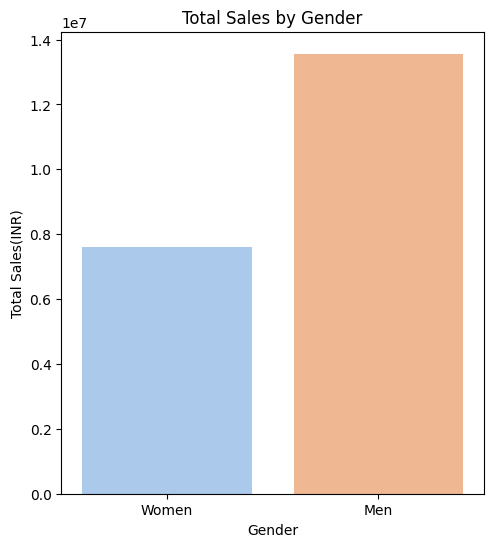

In [10]:
#Total Sales By Gender
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(x=df['Gender'].value_counts().index, y=df.groupby('Gender')['Amount'].sum().values,
            hue=df['Gender'].value_counts().index,palette='pastel')
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales(INR)")

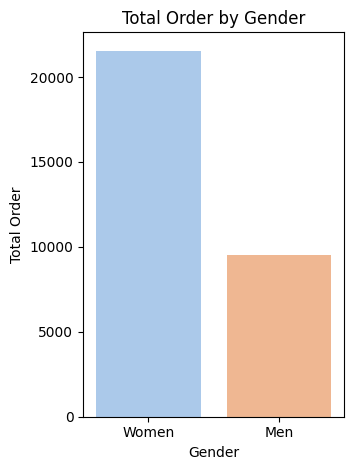

In [11]:
#Total Order by Gender
plt.subplot(1,2,2)
sns.barplot(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts().values,
            hue=df['Gender'].value_counts().index,palette='pastel')
plt.title('Total Order by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Order')
plt.tight_layout()
plt.show()

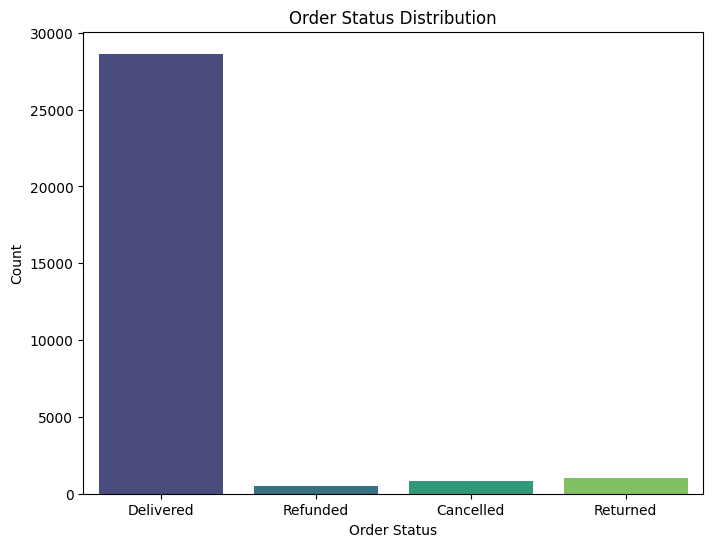

In [12]:
#Order Status Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df,hue='Status',x='Status',palette='viridis')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()

None


<Figure size 1000x600 with 0 Axes>

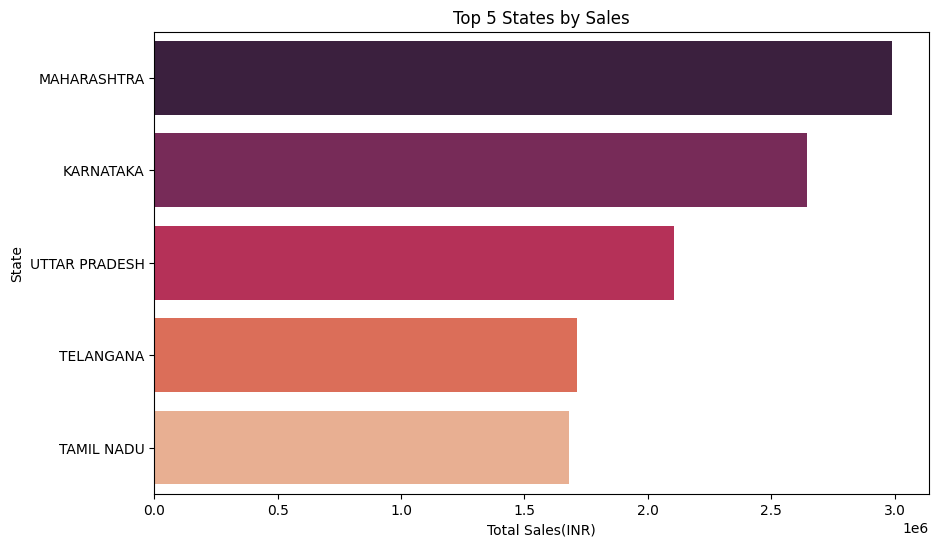

In [13]:
#Top 5 States by Sales
plt.figure(figsize=(10,6))
state_sales=df.groupby('ship-state')['Amount'].sum().reset_index()
state_sales_sorted=state_sales.sort_values(by='Amount',ascending=False)
top_states=state_sales_sorted.head(5)

#plotting
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Amount',y='ship-state',data=top_states,hue='ship-state',palette='rocket')
print(ax.get_legend())
plt.title('Top 5 States by Sales')
plt.xlabel('Total Sales(INR)')
plt.ylabel('State')
plt.show()

None


<Figure size 1000x600 with 0 Axes>

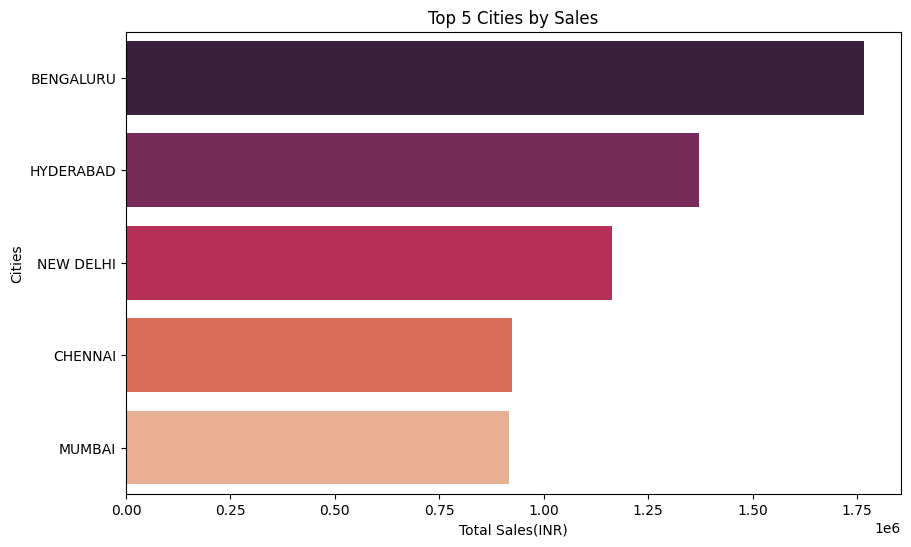

In [14]:
plt.figure(figsize=(10,6))
city_sales=df.groupby('ship-city')['Amount'].sum().reset_index()
city_sales_sorted=city_sales.sort_values(by='Amount',ascending=False)
top_cities=city_sales_sorted.head(5)

#plotting
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Amount',y='ship-city',data=top_cities,hue='ship-city',palette='rocket')
print(ax.get_legend())
plt.title('Top 5 Cities by Sales')
plt.xlabel('Total Sales(INR)')
plt.ylabel('Cities')
plt.show()

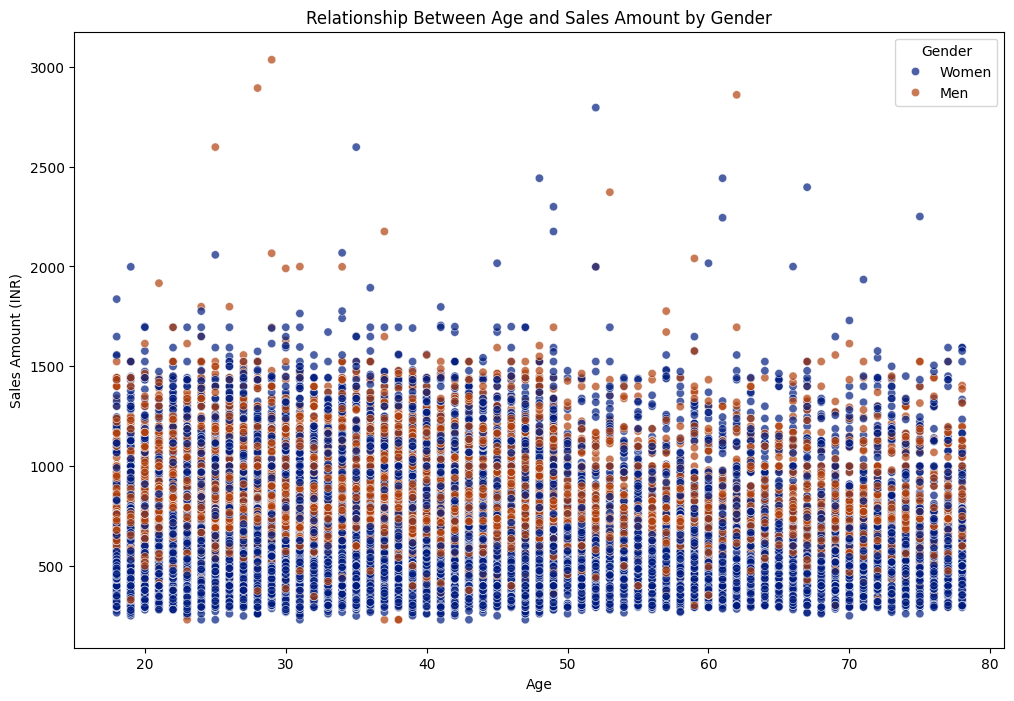

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Age',y='Amount',hue='Gender',palette='dark',alpha=0.7)
plt.title('Relationship Between Age and Sales Amount by Gender')
plt.xlabel('Age')
plt.ylabel('Sales Amount (INR)')
plt.legend(title='Gender')
plt.show()


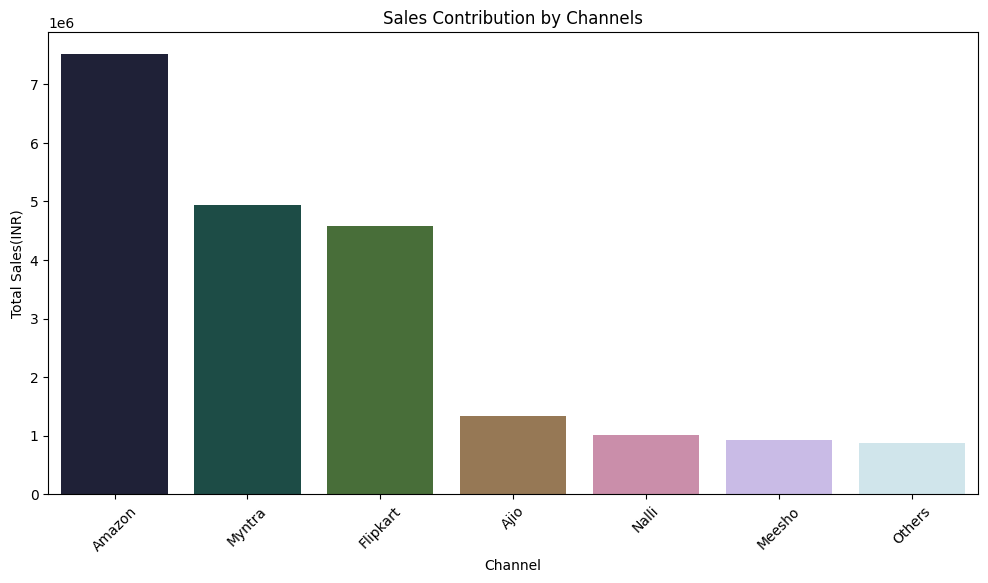

In [16]:
#Calculate sales contribution by chsnnel
channel_sales=df.groupby('Channel ')['Amount'].sum().sort_values(ascending=False)
#Ploting
plt.figure(figsize=(12,6))
sns.barplot(x=channel_sales.index,y=channel_sales.values,hue=channel_sales.index,palette='cubehelix')
plt.title('Sales Contribution by Channels')
plt.xlabel('Channel')
plt.ylabel('Total Sales(INR)')
plt.xticks(rotation=45)
plt.show()

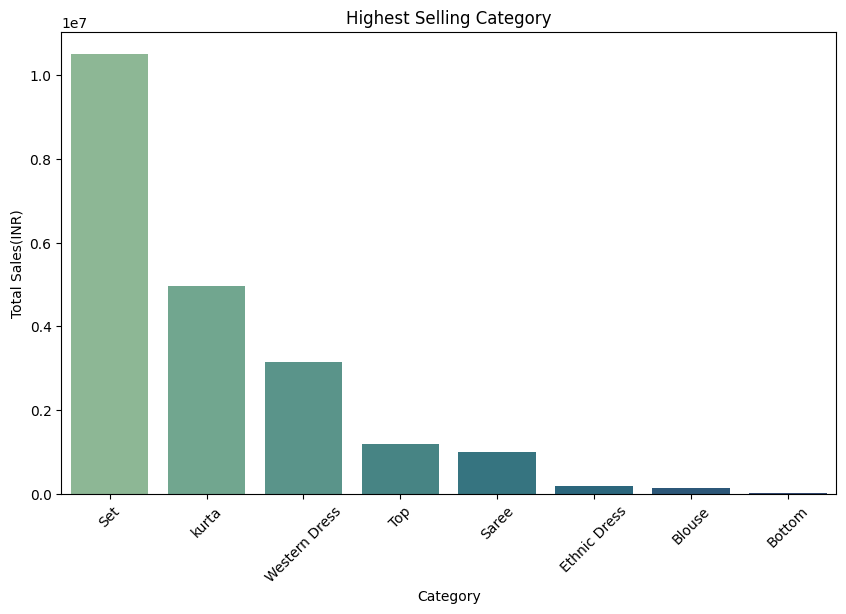

In [17]:
#Calculate sales contribution by category
category_sales=df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
#Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.index,y=category_sales.values,hue=category_sales.index,palette='crest')
plt.title('Highest Selling Category')
plt.xlabel('Category')
plt.ylabel('Total Sales(INR)')
plt.xticks(rotation=45)
plt.show()

None


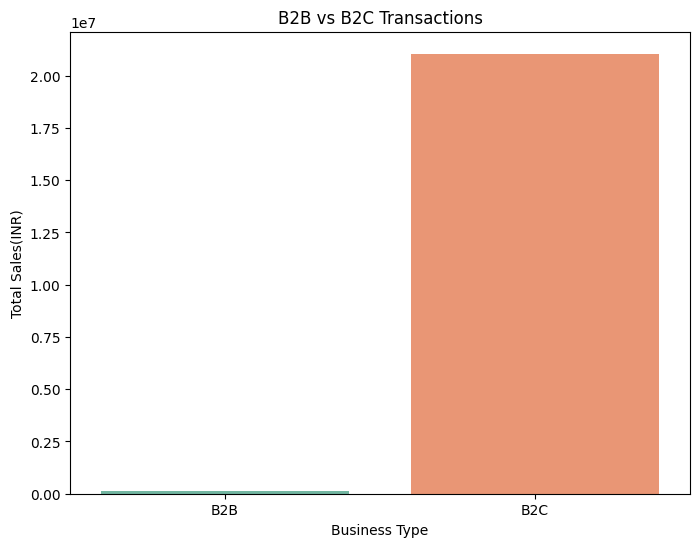

In [19]:
#Calculate total sales by business type
b2b_c2c_sales=df.groupby('Business Type')['Amount'].sum()
#Plotting
plt.figure(figsize=(8,6))
sns.barplot(x=b2b_c2c_sales.index,y=b2b_c2c_sales.values,hue=b2b_c2c_sales.index,palette='Set2')
print(ax.get_legend())
plt.title('B2B vs B2C Transactions')
plt.xlabel('Business Type')
plt.ylabel('Total Sales(INR)')
plt.show()

In [20]:
print(df.columns)

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B',
       'Age Group', 'Month', 'Business Type'],
      dtype='object')
